# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
<ul>
   <li> In the control panel at the top, choose Cell > Cell Type > Markdown
   <li> Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</ul>

<h3>Resources</h3>

<ul>
    <li> Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt
    <li> http://www.amstat.org/publications/jse/jse_data_archive.htm
    <li> Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</ul>

</div>

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [115]:
# Your work here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [116]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

#### Normal Distribution:
Is the distribution of body temperatures normal?

In [117]:
mu, sigma = df.temperature.mean(), df.temperature.std() # mean and standard deviation

In [118]:
n = df.temperature.size

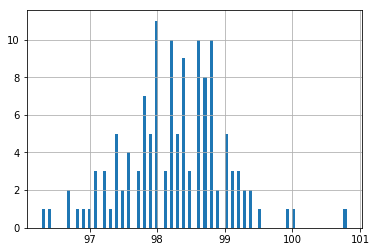

In [104]:
df.temperature.hist(bins=100)

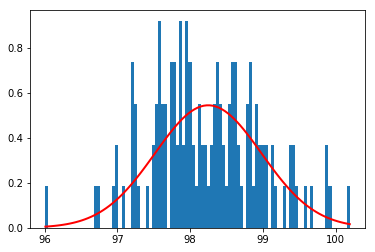

In [119]:
s = np.random.normal(mu, sigma, n)
count, bins, ignored = plt.hist(s, 100, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

In [120]:
abs(mu - np.mean(s)) < 0.01

False

In [121]:
abs(sigma - np.std(s, ddof=1)) < 0.01

False

The temperature data as a collection shows a relatively normal distribution.  It is not as strong as suggested but it follows a normal trend.  With few data points (130) it still provides an outline.  Also, note that with a random sample using only the mean and the standard deviation, the difference between the data's statistics and the random sample changes.  Between means is always false, between standard deviations varies between true and false.

**ANSWER**: Yes

#### Sample Size & Independence:
*Is the sample size large? Are the observations independent?*

In [130]:
df_two = df.drop_duplicates()
df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 129
Data columns (total 3 columns):
temperature    127 non-null float64
gender         127 non-null object
heart_rate     127 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


**Sample size**: CLT says that the sample size should be no more than 30.  In this case, the sample size is 130 observations.  This is good to replicate and create a randomized distribution.  It is adequate.  **Yes, it is large.**

**Independence**: Randomness and combination, as numerical categories, may imply independence.  Temperature and heart rate are numerical values.  Also, with df dropping three duplicates (meaning they had the same combination of temperature, heart rate, and gender), it implies that these are literally independent!  **Yes, they are independent!**

In [158]:
def effectiveSampleSize(data, stepSize = 1) : ## courtesy of Allen Downey's reference Think Stats
  """ Effective sample size, as computed by BEAST Tracer."""
  samples = len(data)

  assert len(data) > 1,"no stats for short sequences"
  
  maxLag = min(samples//3, 1000)

  gammaStat = [0,]*maxLag
  #varGammaStat = [0,]*maxLag

  varStat = 0.0;

  if type(data) != np.ndarray :
    data = np.array(data)

  normalizedData = data - data.mean()
  
  for lag in range(maxLag) :
    v1 = normalizedData[:samples-lag]
    v2 = normalizedData[lag:]
    v = v1 * v2
    gammaStat[lag] = sum(v) / len(v)
    #varGammaStat[lag] = sum(v*v) / len(v)
    #varGammaStat[lag] -= gammaStat[0] ** 2

    # print lag, gammaStat[lag], varGammaStat[lag]
    
    if lag == 0 :
      varStat = gammaStat[0]
    elif lag % 2 == 0 :
      s = gammaStat[lag-1] + gammaStat[lag]
      if s > 0 :
         varStat += 2.0*s
      else :
        break
      
  # standard error of mean
  # stdErrorOfMean = Math.sqrt(varStat/samples);

  # auto correlation time
  act = stepSize * varStat / gammaStat[0]

  # effective sample size
  ess = (stepSize * samples) / act

  return ess

In [134]:
effectiveSampleSize(df.temperature)

129.79550986118835

#### True Population Mean:
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the  *t*  or  *z*  statistic?
* Now try using the other test. How is the result be different? Why?

Here we will uncover the hypothesis testing associated with the true population mean, 98.6, and whether the sample mean is close to it!  

$H_0: mean(x) = 98.6$

$H_a: mean(x) != 98.6$

In this case, a one-sample test is adequate, since this is focusing across all observations regarding temperature.  When dealing with gender, a one-sample test would work.  We'll start with the one-sample T-test since this is the simplest test.  Also, the population parameters are unknown, while the reported mean is 98.6.  Z-statistic works best with known parameters and has a high criteria!  

**Student's T-test**: 

$ t = \frac{\overline{x} - \mu}{\frac{s}{\sqrt{n}}} $


**Z Statistics**: It requires the standard error (SE) and the Z-score

$ SE = \frac{\theta}{\sqrt{N}} $ 

$ z = \frac{M-\mu}{SE}$ 

**Criteria**: Using the T-table, for a one-sample T-test with 129 degrees of freedom and a confidence interval of 95%, the t-statistic is **-1.98**.  

In [152]:
# T-test
# Regular method
t_stat = (mu-98.6)/(sigma/np.sqrt(n)) # t-score
pval = stats.t.sf(np.abs(t_stat), n-1)*2 # p-value
t_stat, pval

(-5.4548232923640789, 2.4106320415609943e-07)

In [150]:
# T-test with scipy.stats
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [157]:
# Z-test
se = (sigma)/np.sqrt(n) # standard error
z_score = (mu-98.6)/se  # z-score
p_values = stats.norm.sf(abs(z_score)) # one-sided
z_score, p_values

(-5.4548232923640789, 2.4510785070566898e-08)

As shown above, the t-statistic is -5.46 < -1.98.  But the p-value is 2.41e-7, which means that this is statistically significant.  We can **reject the null hypothesis** that the sample mean is similar to the population mean and now test the alterantive hypothesis.  And with looking at the z-score and its associative p-value, it too validates this rejection. 

#### Abnormal Temperature:
*At what point should we consider someone's temperature to be abnormal.*
We would consider someone's temperature to be abnormal if it is outside a confidence interval (CI) of 95%. 

$ CI = \mu \pm t^* * \frac{\theta}{\sqrt{N}}$

Start by computing the margin of error and confidence interval.  Here, *t\** = 1.98 to correspond to a 95% percentile.  Another level would be to indicate the possibility of an interquartile range, in this case 1.5 * IQR.  So the mean + 1.5 * IQR may provide a unique solution.

In [176]:
# Margin of error = critical value * standard error, @ 95%
ME = 1.980 * se
CI = [mu - ME , mu + ME]
ME, CI

(0.12732274533902418, [98.121908023891748, 98.376553514569807])

In [173]:
# Confidence Interval @ 95%
stats.t.interval(0.95,                         # Confidence level
                 df = 129,                     # Degrees of freedom
                 loc = mu,                     # Sample mean
                 scale= sigma/np.sqrt(n))      # Standard dev estimate

(98.122002905608042, 98.376458632853513)

In [178]:
# Margin of error, @ 99%
ME = 2.62 * se
CI = [mu - ME , mu + ME]
ME, CI

(0.16847757211527445, [98.080753197115499, 98.417708341346056])

In [179]:
# Confidence Interval @ 99%
stats.t.interval(0.99,                        # Confidence level
                 df = 129,                    # Degrees of freedom
                 loc = mu,                    # Sample mean
                 scale= sigma/np.sqrt(n))     # Standard dev estimate

(98.08110824239759, 98.417353296063965)

So between 98.12 and 98.38 degrees Fahrenheit is a healthy interval relatively 100% of the time (keep in mind, the p-value is in magnitude of -7).  Anything outside these (i.e. x < 98.12 , x > 98.38)  would be abnormal.  

#### Male vs Female Temperature:
*Is there a significant difference between males and females in normal temperature?*

To repeat using two different distributions (male and female), the steps include:

* Normal distribution (probably)
* CLT qualifications (sample size, independence): both samples are large (n > 30)
* True population mean
* Abnormal distributions

In [182]:
# Differentiate temperatures by gender
mtmp = df[df.gender=='M'].temperature
wtmp = df[df.gender=='F'].temperature

In [241]:
# Mean, standard deviation, sample size
mmu, msigma, mn = mtmp.mean(), mtmp.std(), mtmp.size
wmu, wsigma, wn = wtmp.mean(), wtmp.std(), wtmp.size
(mmu, msigma, mn), (wmu, wsigma, wn)

((98.1046153846154, 0.6987557623265908, 65),
 (98.39384615384613, 0.7434877527313665, 65))

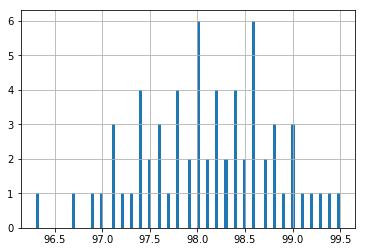

In [214]:
mtmp.hist(bins=100);

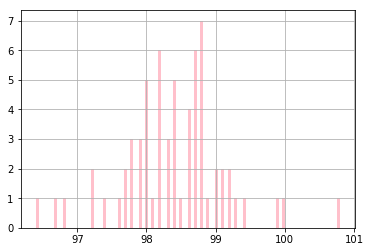

In [215]:
wtmp.hist(bins=100, color='pink');

**Central Limit Theorem**: 
Both distributions male and female ...
1. look normal.
2. have sample sizes over 30.
3. have independent observations (women's temperatures doesn't affect men's temperature, vice versa).

**True Population Mean**:
Because of two separations from the same sample, this will use a two-sample T-test. With unknown population parameters in play, we'll go with a T-statistic.  The hypothesis testing provides the following:

$H_0: \overline{x_m} = \overline{x_w} $  
$H_a: \overline{x_m} != \overline{x_w} $

Let's calculate some statistics.

$t = \frac{\overline{X_1}-\overline{X_2}}{s_\overline{\delta}}$

$s_\overline{\delta} = \sqrt{\frac{{s_1}^2}{{n_1}^2}+\frac{{s_2}^2}{{n_2}^2}}$

$v = \frac{(\frac{{s_1}^2}{n_1})+(\frac{{s_2}^2}{n_2})^2})^2
{\frac{\frac{{{s_1}^2}{n_1})^2}}{n_1-1} + \frac{\frac{{s_2}^2}{{n_2}^2}}{n_2-1}} $ 

In [239]:
# Difference in means
diff_mu = abs(mmu - wmu)
mmu, wmu, diff_mu

(98.1046153846154, 98.39384615384613, 0.289230769230727)

**Criteria**: With unequal variance, we must find the proper degrees of freedom, with n_w = n_m = 65.

In [250]:
v = np.square((np.square(msigma)/mn)+(np.square(wsigma)/wn))/(np.square(np.square(msigma)/mn)/(mn-1)+(np.square(np.square(wsigma)/wn)/(wn-1)))
v

127.5103008303909

In [240]:
# 2-sample t-test (unequal variance)
s_q = np.sqrt((np.square(msigma)/mn)+(np.square(wsigma)/wn))
t_stat_2 = diff_mu / s_q
s_q, t_stat_2

(0.12655395041982642, 2.2854345381652741)

In [238]:
# 2-sample t-test via scipy
stats.ttest_ind(wtmp, mtmp, equal_var=False) 

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

In [246]:
# Margin of error = critical value * standard error, @ 95%, 1.980
ME2 = s_q * 1.98
CI2 = [((wmu-mmu) - ME2), ((wmu-mmu) + ME2)]
ME2, CI2

(0.25057682183125629, [0.038653947399470701, 0.53980759106198328])

### Story

In conclusion, Carl Wunderlink suggested in his 1868 book that the mean normal temperature was around 98.6 degrees Fahrenheit.  By using a sample of 130 observations and a popular test (the student's T-test), the null hypothesis (that the sample's mean temperature reflects the population's) was rejected, believing that the temperature wasn't there.  With 95% confidence, it hovered between 98.12 and 98.37 degrees.  It is still used as the de facto mean temperature to describe the human body's temperature.  However, truth is in the details, and the popular metric is just that, an estimate!

As for gender differences regarding temperature, the two-sample T-test with 127 degrees of freedom and a confidence interval of 95% promoted a p-value of 0.024.  There is 2.4% that the null hypothesis holds (in other words, the mean temperatures between males and females exist).  Therefore, we may **reject the null hypothesis of gender-neutral temperature**.  95% confidence lies with a gender difference of 0.0386 - 0.539. 